In [4]:
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os


In [5]:
#with ZipFile('/content/drive/MyDrive/facial_expression.zip','r') as zipobj:
  #zipobj.extractall('drive/MyDrive/Colab Notebooks/origin')


In [6]:
test_dir="/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test"
train_dir="/content/drive/MyDrive/Colab Notebooks/origin/Dataset/train"
BATCH_SIZE=64

In [7]:
for classes in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, classes)
    length = len(os.listdir(class_dir))

    print(f"{classes}: {length}")

anger: 4462
disgust: 493
fear: 4593
happiness: 8110
neutral: 5572
sadness: 5483
surprise: 1414


In [8]:
for classes in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, classes)
    length = len(os.listdir(class_dir))
    print(f"{classes}: {length}")

anger: 491
disgust: 55
fear: 528
happiness: 879
neutral: 626
sadness: 594
surprise: 416


In [9]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image Shape: {img.shape}")

    return img

In [10]:
class_names = ['anger','disgust','fear','happiness','neutral','sadness','surprise']

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

Found 30126 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


MODEL BUILDING: CNN(CLASSIFIER)

In [12]:
#Initialising classsifier
model=Sequential()

#Step 1: Convolution
model.add(Conv2D(16,(3,3), input_shape=(128,128,3), activation='relu'))

#step 2: Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#step 3: ADDING A SECOND CONVOLUTIONAL LAYER
model.add(Conv2D(32,(3,3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=7,activation='softmax'))

model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [14]:
#training_set[0][1].shape
test_set[0][1].shape

(64, 7)

In [16]:
history = model.fit(training_set,
                    epochs=5,
                    validation_data=test_set,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))
model.save('model1.h5')

Epoch 1/5
471/471 [==============================] - 432s 914ms/step - loss: 1.4296 - accuracy: 0.4424 - val_loss: 1.4170 - val_accuracy: 0.4478
Epoch 2/5
471/471 [==============================] - 417s 886ms/step - loss: 1.3818 - accuracy: 0.4639 - val_loss: 1.3769 - val_accuracy: 0.4622
Epoch 3/5
471/471 [==============================] - 431s 916ms/step - loss: 1.3466 - accuracy: 0.4761 - val_loss: 1.4372 - val_accuracy: 0.4572
Epoch 4/5
471/471 [==============================] - 422s 895ms/step - loss: 1.3165 - accuracy: 0.4907 - val_loss: 1.4048 - val_accuracy: 0.4531
Epoch 5/5
471/471 [==============================] - 413s 876ms/step - loss: 1.2979 - accuracy: 0.4973 - val_loss: 1.3549 - val_accuracy: 0.4695


In [17]:
model.evaluate(test_set)

57/57 [==============================] - 15s 258ms/step - loss: 1.3549 - accuracy: 0.4695


[1.3548829555511475, 0.469490110874176]

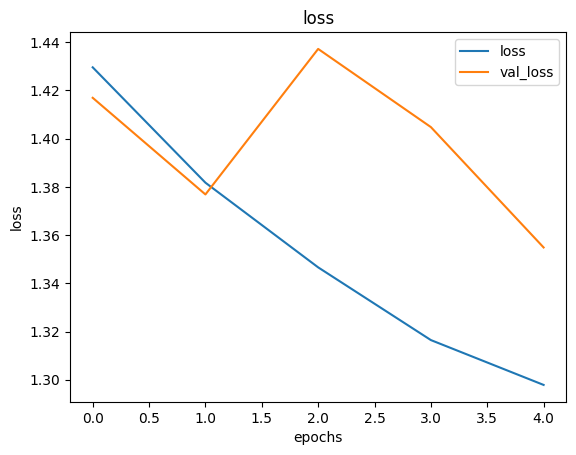

In [18]:
import pandas as pd
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss');

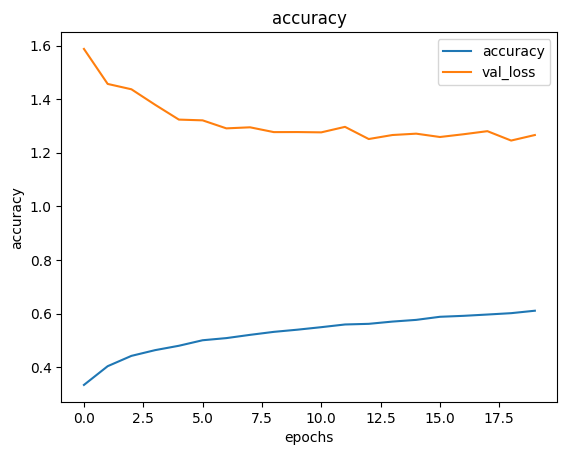

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_loss']].plot()
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy');

1/1 [==============================] - 0s 376ms/step
Image: /content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/disgust/148059154.png, Prediction: 0


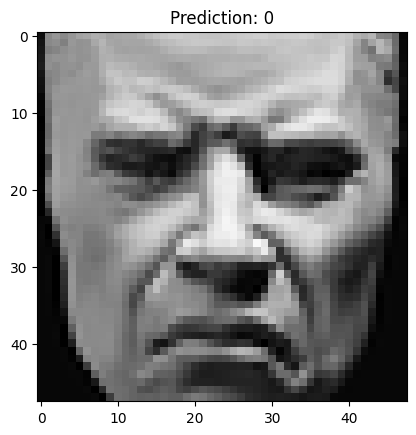

1/1 [==============================] - 0s 39ms/step
Image: /content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/anger/10245426.png, Prediction: 0


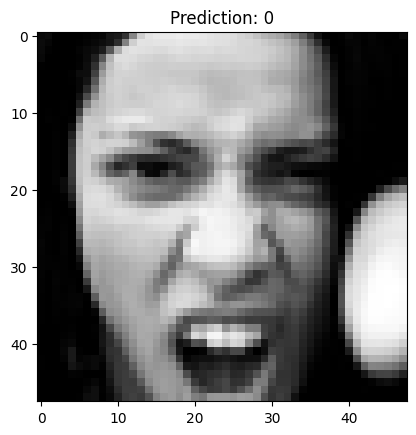

1/1 [==============================] - 0s 52ms/step
Image: /content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/anger/446974377.png, Prediction: 0


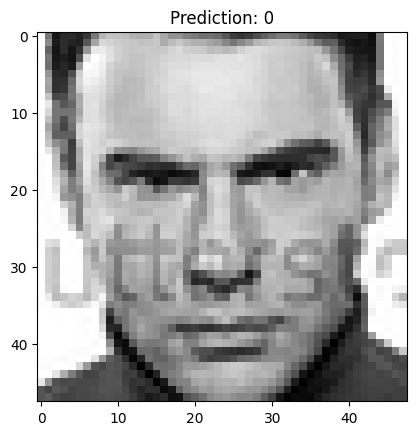

1/1 [==============================] - 0s 36ms/step
Image: /content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/sadness/102856659.png, Prediction: 4


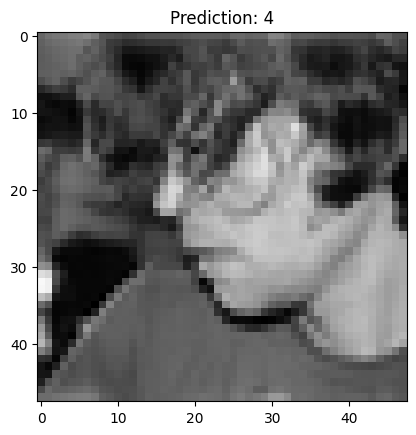

1/1 [==============================] - 0s 32ms/step
Image: /content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/happiness/108087848.png, Prediction: 5


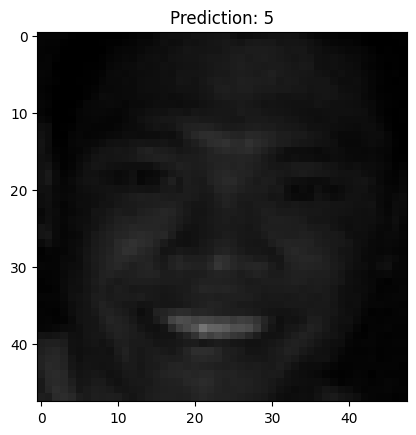

1/1 [==============================] - 0s 29ms/step


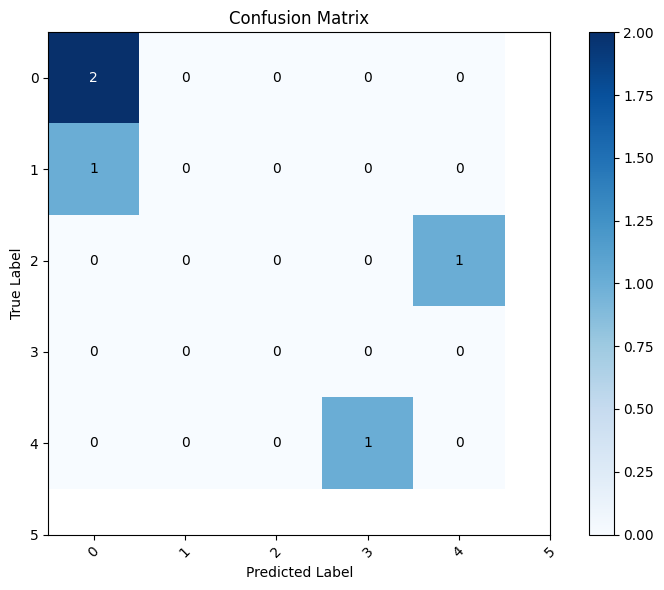

In [29]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import confusion_matrix

# Load the pre-trained model
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((128, 128))
    expand_input = np.expand_dims(resize_image, axis=0)
    input_data = np.array(expand_input)
    input_data = input_data / 255
    return input_data

# List of test image file paths
test_image_paths = [
    "/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/disgust/148059154.png",
    "/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/anger/10245426.png",
    "/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/anger/446974377.png",
    "/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/sadness/102856659.png",
    "/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/happiness/108087848.png"
]

ground_truth_labels = [1,0,0,5,3]
predictions = []
for image_path in test_image_paths:
    input_data = preprocess_image(image_path)
    pred = loaded_model.predict(input_data)
    result = pred.argmax()

    # Print or use the result as needed
    print(f"Image: {image_path}, Prediction: {result}")

    # If you want to display the image and prediction, you can use matplotlib
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {result}")
    plt.show()
for image_path in test_image_paths:
    input_data = preprocess_image(image_path)
    pred = loaded_model.predict(input_data)
    result = pred.argmax()
    predictions.append(result)

# Create the confusion matrix
cm = confusion_matrix(ground_truth_labels, predictions)

# Plot the confusion matrix
classes = [0, 1, 2, 3, 4, 5]  # Update with the actual class labels if different
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt), ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
training_set.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}